In [2]:
import os 
import torch
import lightning
import numpy as np 
import matplotlib.pyplot as plt 

from mlcolvar.utils.io import load_dataframe
from mlcolvar.utils.timelagged import create_timelagged_dataset
from mlcolvar.data import DictModule

torch.manual_seed(42)

In [4]:
frame_number = 100000
filename = ['COLVAR']

df = load_dataframe(filename, start=0, stop=frame_number)
X = df.filter(regex='d|phi|psi').values # Input desciptors are anything containing distance, phi angle or psi angle
t = df['time'].values

lag_time = 100

dataset = create_timelagged_dataset(X,t, lag_time=lag_time)
datamodule = DictModule(dataset=dataset, lengths = [0.8,0.2], shuffle=True)

/home/mjg120/miniconda3/envs/ase-v1/lib/python3.13/site-packages/mlcolvar/utils/timelagged.py:140: UserWarning: Monitoring the progress for the search of time-lagged configurations with a progress_bar requires `tqdm`.
  warnings.warn(
/home/mjg120/miniconda3/envs/ase-v1/lib/python3.13/site-packages/mlcolvar/utils/timelagged.py:186: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /home/conda/feedstock_root/build_artifacts/libtorch_1739474892959/work/torch/csrc/utils/tensor_new.cpp:254.)
  x_t = torch.stack(x_t) if type(x) == torch.Tensor else torch.Tensor(x_t)


In [5]:
df

,time,phi_1,psi_1,phi_2,psi_2,phi_3,psi_3,phi_4,psi_4,phi_5,...,d182,d183,d184,d185,d186,d187,d188,d189,d190,walker
0,0.0,-1.097912,-0.760566,-1.174261,-0.668517,-1.055026,-0.719294,-1.198587,-0.818915,-1.097912,...,5.407292,5.077747,6.174966,3.808038,5.417520,5.076305,3.797188,5.376438,3.707128,0
1,1.0,-1.109119,-0.761407,-1.229981,-0.579601,-0.914386,-0.804764,-0.906871,-0.932730,-1.197229,...,5.691728,5.324019,6.359223,3.913410,5.523369,5.010530,3.915475,5.546128,3.918242,0
2,2.0,-1.084716,-0.627481,-1.450581,-0.467167,-1.098779,-0.674811,-1.431549,-0.639329,-1.106265,...,5.524603,5.273030,6.237706,3.761193,5.478512,4.999012,3.987682,5.587408,3.921376,0
3,3.0,-1.174929,-0.791744,-1.177063,-0.371027,-1.587600,-0.578240,-1.534493,-0.197425,-1.019303,...,5.719922,5.359795,6.447410,3.797057,5.222440,5.223130,3.808241,5.879454,3.870770,0
4,4.0,-1.475820,-0.830501,-1.237514,-0.171685,-1.571716,-0.592959,-1.312402,-0.315642,-1.441062,...,5.392108,5.318926,6.416463,3.845516,5.308933,5.133364,3.799595,5.820335,3.760253,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995.0,1.474374,2.500316,-2.644527,1.748551,-2.790305,2.480019,-2.702109,1.004756,-2.826739,...,6.484444,6.945696,5.016024,3.875737,6.416851,5.905087,3.864763,5.182997,3.803200,0
99996,99996.0,1.634708,2.285076,-2.708955,1.746965,-2.866635,2.481818,-2.656841,0.855308,-2.899243,...,6.505612,6.983146,5.072317,3.876676,6.427854,5.835655,3.859650,5.172522,3.775635,0
99997,99997.0,1.705404,2.204870,-2.647168,1.772847,-2.807052,2.482864,-2.644346,0.895307,-2.957806,...,6.400435,7.002688,5.040818,3.876043,6.522881,5.853236,3.848391,5.146821,3.819812,0
99998,99998.0,1.903474,2.161983,-2.695297,1.848400,-2.772688,2.350339,-2.670800,0.854556,-3.094565,...,6.347953,6.996218,5.076758,3.855624,6.566272,5.940683,3.842169,5.156159,3.812283,0


In [6]:
from mlcolvar.cvs import DeepTICA

n_components = 2
nn_layers = [222, 30, 30, 2]
options = {'nn': {'activation': 'tanh'}}

model = DeepTICA(nn_layers, options=options)
model

DeepTICA(
  (loss_fn): ReduceEigenvaluesLoss()
  (norm_in): Normalization(in_features=222, out_features=222, mode=mean_std)
  (nn): FeedForward(
    (nn): Sequential(
      (0): Linear(in_features=222, out_features=30, bias=True)
      (1): Tanh()
      (2): Linear(in_features=30, out_features=30, bias=True)
      (3): Tanh()
      (4): Linear(in_features=30, out_features=2, bias=True)
    )
  )
  (tica): TICA(in_features=2, out_features=2)
)

In [7]:
from lightning.pytorch.callbacks.early_stopping import EarlyStopping
from mlcolvar.utils.trainer import MetricsCallback

metrics = MetricsCallback()
early_stopping = EarlyStopping(monitor="valid_loss", min_delta=1e-5, patience =100)

# define trainer
trainer = lightning.Trainer(callbacks=[metrics, early_stopping],
                     max_epochs=500, logger=None, enable_checkpointing=False)

# fit
trainer.fit( model, datamodule )

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/mjg120/miniconda3/envs/ase-v1/lib/python3.13/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default

  | Name    | Type                  | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------------------
0 | loss_fn | ReduceEigenvaluesLoss | 0      | train | ?        | ?        
1 | norm_in | Normalization         | 0      | train | [1, 222] | [1, 222] 
2 | nn      | FeedForward    

/home/mjg120/miniconda3/envs/ase-v1/lib/python3.13/site-packages/lightning/pytorch/loops/fit_loop.py:310: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 406: 100%|██████████| 1/1 [00:00<00:00,  1.07it/s, v_num=0]


In [8]:
metrics.metrics.keys()

dict_keys(['epoch', 'train_loss', 'train_loss_step', 'train_eigval_1', 'train_eigval_1_step', 'train_eigval_2', 'train_eigval_2_step', 'valid_loss', 'valid_loss_epoch', 'valid_eigval_1', 'valid_eigval_1_epoch', 'valid_eigval_2', 'valid_eigval_2_epoch', 'train_loss_epoch', 'train_eigval_1_epoch', 'train_eigval_2_epoch'])

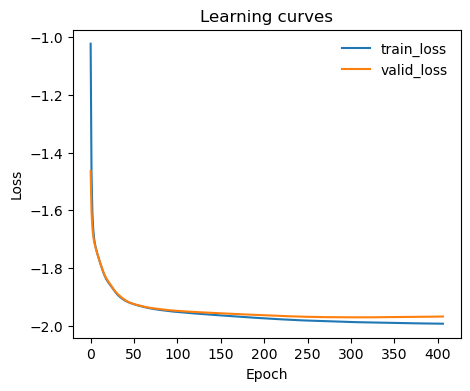

In [9]:
from mlcolvar.utils.plot import plot_metrics

#ax = plot_metrics(metrics.metrics,
#                  keys=[x for x in  metrics.metrics.keys() if 'train_loss' in x],#['train_loss_epoch','valid_loss'],
                  #linestyles=['-.','-'], colors=['fessa1','fessa5'],
 #                 yscale='linear')

ax = plot_metrics(metrics.metrics,
                  keys= ['train_loss', 'valid_loss'],#['train_loss_epoch','valid_loss'],
                  #linestyles=['-.','-'], colors=['fessa1','fessa5'],
                  yscale='linear')

Text(0, 0.5, 'Eigenvalue')

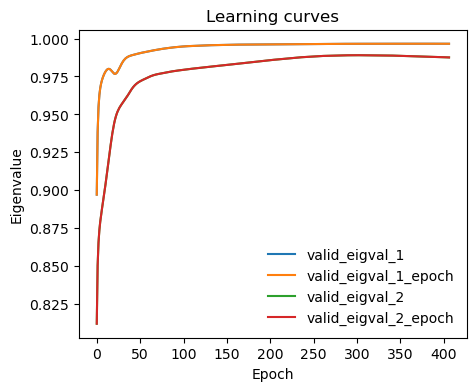

In [21]:
ax = plot_metrics(metrics.metrics,
                  keys=[x for x in  metrics.metrics.keys() if 'valid_eigval' in x],#['train_loss_epoch','valid_loss'],
                  #linestyles=['-.','-'], colors=['fessa1','fessa5'],
                  yscale='linear')
ax.set_ylabel("Eigenvalue")

In [10]:
from mlcolvar.core.transform import Normalization
from mlcolvar.core.transform.utils import Statistics

#X = dataset[:]['data']
with torch.no_grad():
    model.postprocessing = None # reset
    s = model(torch.Tensor(X))

norm =  Normalization(n_components, mode='min_max', stats = Statistics(s) )
model.postprocessing = norm

Text(0, 0.5, 'Deep-TICA 2')

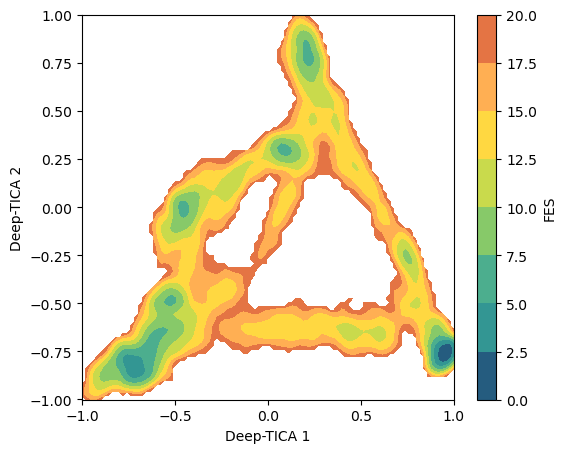

In [11]:
from mlcolvar.utils.fes import compute_fes

fig,ax = plt.subplots(1,1,figsize=(6,5),dpi=100)

# compute cvs
with torch.no_grad():
    s = model(torch.Tensor(X)).numpy()

#w = np.exp(logweights)
fes,grid,bounds,error = compute_fes(s,
                                    blocks=1,
                                    bandwidth=0.01, scale_by='range',
                                    plot=True, plot_max_fes=20, ax = ax, eps=1e-10)

ax.set_xlabel('Deep-TICA 1')
ax.set_ylabel('Deep-TICA 2')

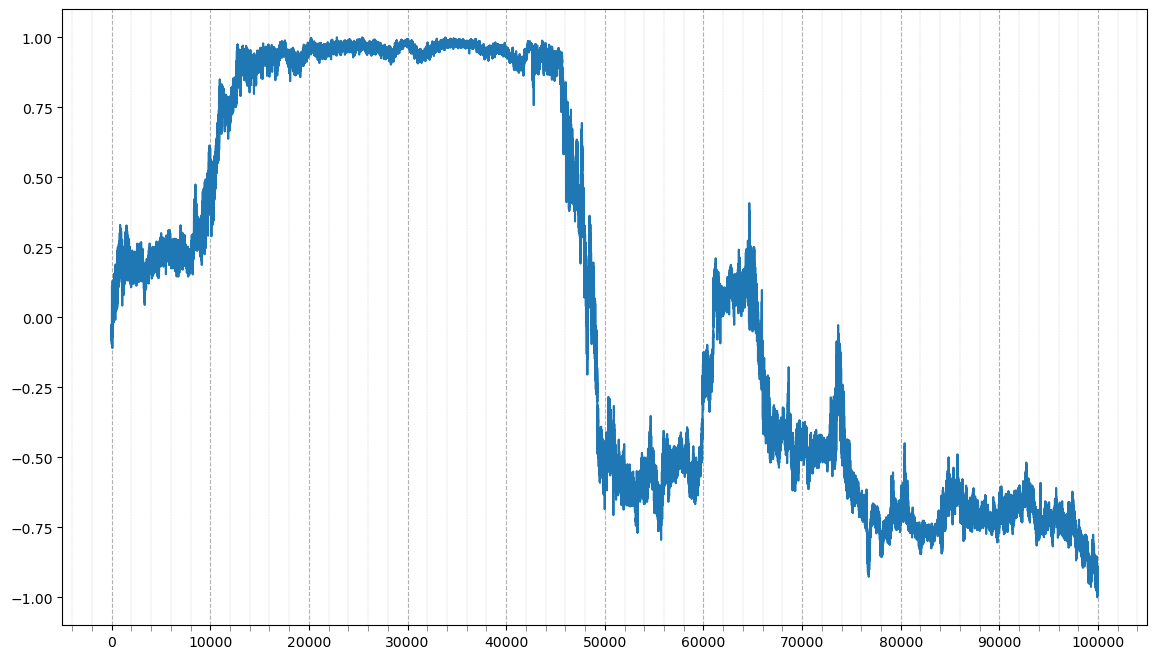

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

tt = np.arange(len(s))

# Plot your data
plt.figure(figsize=[14, 8])
plt.plot(tt, s[:, 0])

# Set major x-ticks every 10,000 frames
xtick_interval = 10000
xticks = np.arange(start=tt.min(), stop=tt.max() + xtick_interval, step=xtick_interval)
plt.xticks(xticks)

# Add minor ticks every 2,000 frames
ax = plt.gca()  # Get current axis
ax.xaxis.set_minor_locator(MultipleLocator(2000))
ax.tick_params(axis='x', which='minor', length=4, color='gray')  # Optional: style the minor ticks
ax.grid(axis='x', which='major', linestyle='--', linewidth=0.8)
ax.grid(axis='x', which='minor', linestyle='--', linewidth=0.2)


# Labels and display
plt.show()


In [294]:
model.to_torchscript(file_path='deeptica_cv1_lag100.ptc', method='trace')

DeepTICA(
  original_name=DeepTICA
  (loss_fn): ReduceEigenvaluesLoss(original_name=ReduceEigenvaluesLoss)
  (norm_in): Normalization(original_name=Normalization)
  (nn): FeedForward(
    original_name=FeedForward
    (nn): Sequential(
      original_name=Sequential
      (0): Linear(original_name=Linear)
      (1): Tanh(original_name=Tanh)
      (2): Linear(original_name=Linear)
      (3): Tanh(original_name=Tanh)
      (4): Linear(original_name=Linear)
    )
  )
  (tica): TICA(original_name=TICA)
  (postprocessing): Normalization(original_name=Normalization)
)